# Using geoPandas

Here we give a quick example of using geoPandas.  The main support which `tilemapbase` gives is to allow you to work with a standardised projection, either [EPSG:3857](http://spatialreference.org/ref/sr-org/6864/) or [EPSG:3785](http://spatialreference.org/ref/epsg/popular-visualisation-crs-mercator/)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import tilemapbase
tilemapbase.start_logging()

In [2]:
features = [
    { "properties" : {"name" : "My office"},
        "geometry" : { "type": "Point", "coordinates" : (-1.554934, 53.804198)}
    },
    { "properties" : {"name" : "Library"},
        "geometry" : { "type": "Point", "coordinates" : (-1.554664, 53.806221)}
    },
    { "properties" : {"name" : "Gym"},
        "geometry" : { "type": "Point", "coordinates" : (-1.553366, 53.804251)}
    }   
]

frame = gpd.GeoDataFrame.from_features(features)

In [3]:
frame.crs = {"init": "EPSG:4326"}
frame = frame.to_crs({"init": "EPSG:3857"})
frame

,geometry,name
0,POINT (-173094.4610971479 7133160.606117154),My office
1,POINT (-173064.4048346338 7133541.955845569),Library
2,POINT (-172919.912135585 7133170.596755204),Gym


In [4]:
extent = tilemapbase.extent_from_frame(frame, 600, 25)

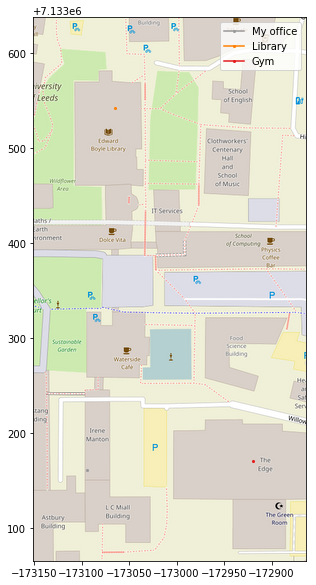

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

extent.plothq(ax, tilemapbase.tiles.OSM)
frame.plot(ax=ax, column="name")
ax.legend(frame.name)
None